<a href="https://colab.research.google.com/github/mahsakn/Identification_of_cataracts/blob/dev/data_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
data=drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import cv2, PIL, glob, pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import models, layers
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, GlobalAveragePooling2D, ReLU, BatchNormalization, Activation
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
PATH = '/content/gdrive/MyDrive/Data/'

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [PATH + f for f in listdir(PATH) if isfile(join(PATH, f))]


In [ ]:
data_dir = pathlib.Path(PATH)


In [ ]:
# import os
# import shutil
# dir_cataract ='/content/gdrive/MyDrive/Data/cataract'
# dir_normal ='/content/gdrive/MyDrive/Data/normal'
# if not os.path.isdir(dir_cataract):
#   os.makedirs(dir_cataract)
# if not os.path.isdir(dir_normal):
#   os.makedirs(dir_normal)
# for root, dirs, files in os.walk((os.path.normpath(/content/gdrive/MyDrive/images/)), topdown=False):
#     for name in files:
#         SourceFolder = os.path.join(root,name)
#         if "normal" in name:
#             shutil.move(SourceFolder, dir_normal)
#         elif "cataract" in name :
#             shutil.move(SourceFolder, dir_cataract)


In [ ]:
img_height = 180
img_width = 180
img_size=(180,180)

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = image_dataset_from_directory(data_dir,
                                        seed = 123,
                                        image_size=(img_height, img_width),
                                        validation_split=0.2,
                                        subset='training')

Found 2922 files belonging to 2 classes.
Using 2338 files for training.


In [ ]:
val_ds = image_dataset_from_directory(data_dir,
                                      seed = 123,
                                      image_size=(img_height, img_width),
                                      validation_split=0.2,
                                      subset='validation')

Found 2922 files belonging to 2 classes.
Using 584 files for validation.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

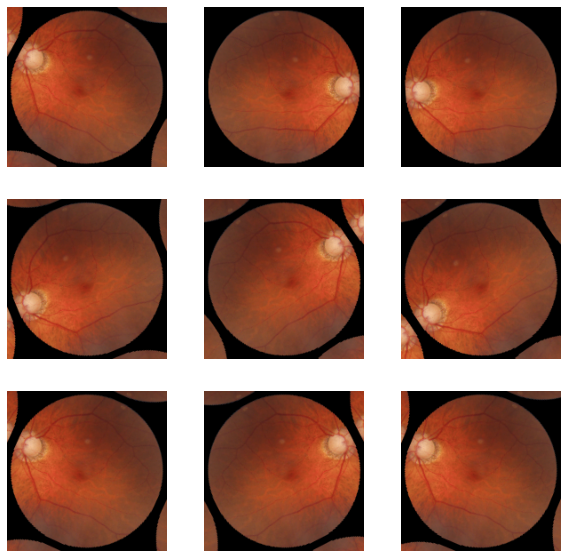

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
import tensorflow as tf
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)

In [ ]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Input(shape=(img_size[0], img_size[1], 3)),
    layers.Rescaling(1.0 / 255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
    ])

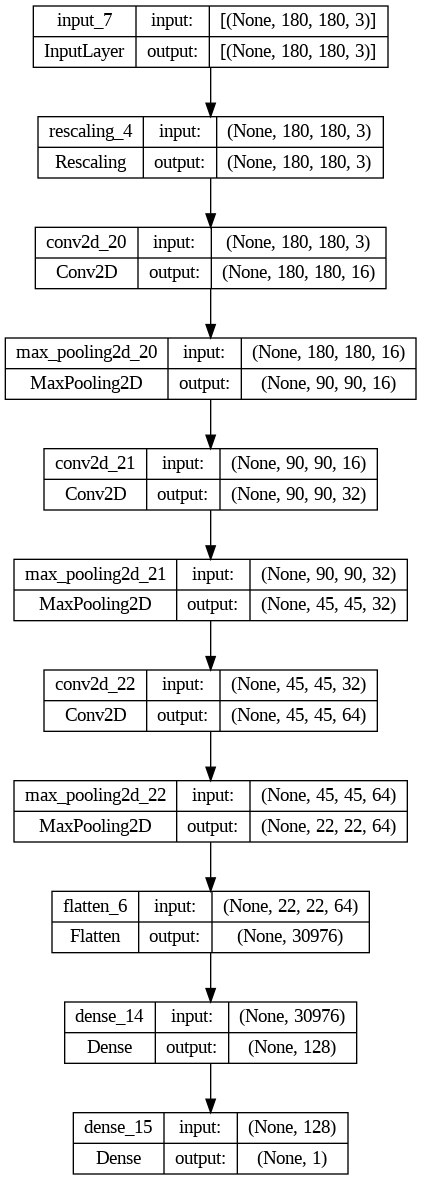

In [ ]:
# keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 45, 45, 64)       

In [ ]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

In [ ]:
# epochs = 13
# model.fit(
#     train_ds,
#     epochs=epochs,
#     callbacks=callbacks,
#     validation_data=val_ds,
# )

Epoch 1/13
74/74 [==============================] - 91s 1s/step - loss: 0.1288 - accuracy: 0.9474 - val_loss: 0.2155 - val_accuracy: 0.9110
Epoch 2/13
74/74 [==============================] - 86s 1s/step - loss: 0.1231 - accuracy: 0.9508 - val_loss: 0.1290 - val_accuracy: 0.9452
Epoch 3/13
74/74 [==============================] - 85s 1s/step - loss: 0.1393 - accuracy: 0.9410 - val_loss: 0.2997 - val_accuracy: 0.9007
Epoch 4/13
74/74 [==============================] - 89s 1s/step - loss: 0.1056 - accuracy: 0.9602 - val_loss: 0.2910 - val_accuracy: 0.9161
Epoch 5/13
74/74 [==============================] - 86s 1s/step - loss: 0.1025 - accuracy: 0.9589 - val_loss: 0.1765 - val_accuracy: 0.9281
Epoch 6/13
74/74 [==============================] - 94s 1s/step - loss: 0.1131 - accuracy: 0.9551 - val_loss: 0.1967 - val_accuracy: 0.9161
Epoch 7/13
74/74 [==============================] - 86s 1s/step - loss: 0.0981 - accuracy: 0.9654 - val_loss: 0.2477 - val_accuracy: 0.9195
Epoch 8/13
74/74 [==

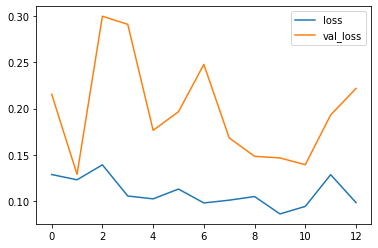

In [ ]:
# model_history = pd.DataFrame(model.history.history)
# model_history[['loss', 'val_loss']].plot()

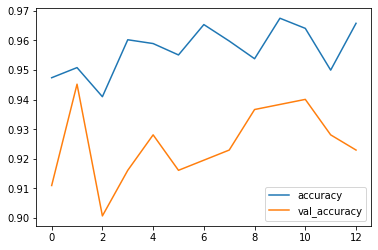

In [ ]:
# model_history = pd.DataFrame(model.history.history)
# model_history[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.save("model.h5")

In [ ]:
!pip install -U gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
my_model = tf.keras.models.load_model("model.h5")

In [ ]:
import numpy as np
trainableParams = np.sum([np.prod(v.get_shape()) for v in my_model.trainable_weights])
nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in my_model.non_trainable_weights])
totalParams = trainableParams + nonTrainableParams

print("trainableParams",trainableParams)
print("nontrainableParams",nonTrainableParams)
print("totalParams",totalParams)

trainableParams 3988769
nontrainableParams 0.0
totalParams 3988769.0


In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from glob import glob
import pandas as pd

img_size = (180, 180)
d = {0:'cataract', 1:'normal'}

def predict_images(dir='/content/gdrive/MyDrive/test_images', res_file='result.csv'):

    files = glob(dir+'/*')
    d_test={}
    for file in files:
        image = load_img(file, target_size=img_size)
        image = np.array(image)
        pred = my_model.predict(np.expand_dims(image, axis=0))[0][0]
        pred = int(np.round(pred))
        d_test[file.split('/')[5]]=d[pred]

        d_csv = {'name':list(d_test.keys()), 'label': list(d_test.values())}
    df = pd.DataFrame.from_dict(d_csv)
    print(df)
    return df.to_csv(res_file, index=False)

In [ ]:
predict_images(dir='/content/gdrive/MyDrive/test_images', res_file='result.csv')

1/1 [==============================] - 0s 32ms/step
    name     label
0  4.jpg    normal
1  2.jpg    normal
2  3.jpg    normal
3  1.jpg  cataract


In [ ]:
import pandas as pd
# result = pd.read_csv('/content/result.csv')
result = pd.DataFrame({'name': ['1.jpg', '2.jpeg', '3.jpeg', '4.jpg'], 'label': ['normal', 'normal', 'normal', 'cataract']})
# ref = pd.read_csv('/content/ref.csv')
ref = pd.DataFrame({'name': ['1.jpg', '2.jpeg', '3.jpeg', '4.jpg'], 'true_label': ['cataract', 'normal', 'normal', 'cataract']})
merg = pd.merge(ref, result, on='name', how='left')

from sklearn.metrics import classification_report
print(classification_report(y_true=merg.true_label, y_pred=merg.label))

              precision    recall  f1-score   support

    cataract       0.50      0.50      0.50         2
      normal       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4

